In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from shapely.geometry import Point

cdata = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()

def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

del cdata

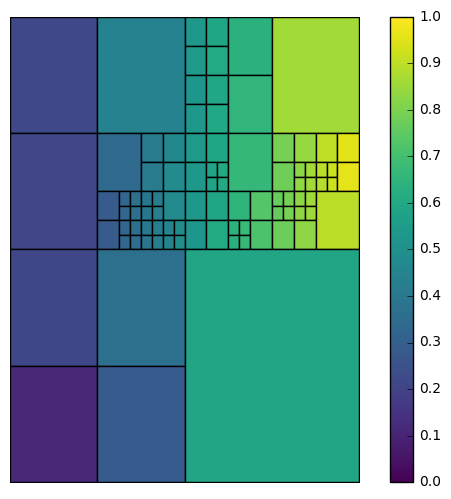

In [3]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='LATDEP')

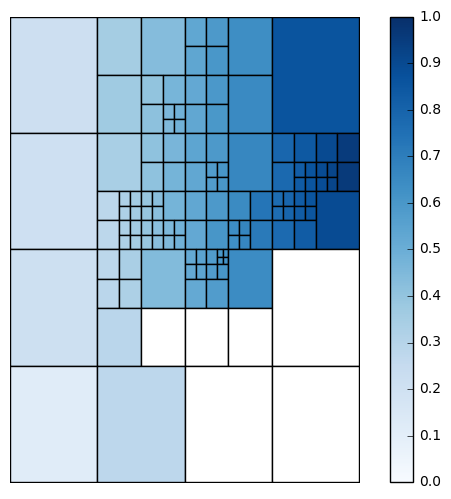

In [4]:
gplt.aggplot(collisions, nmin=20, nmax=500, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Blues')

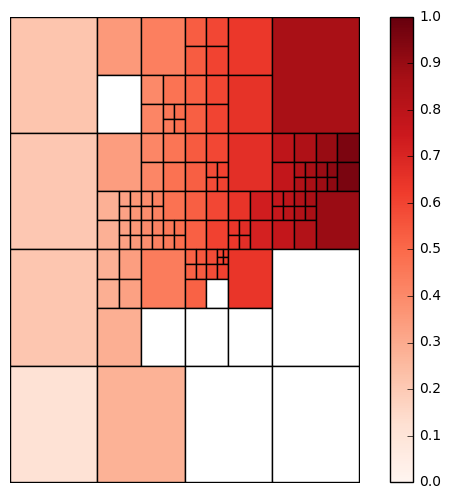

In [5]:
gplt.aggplot(collisions, nmin=20, nmax=500, nsig=5, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Reds')

In [4]:
import mplleaflet

In [5]:
gplt.aggplot(collisions, hue='LATDEP')
mplleaflet.show()

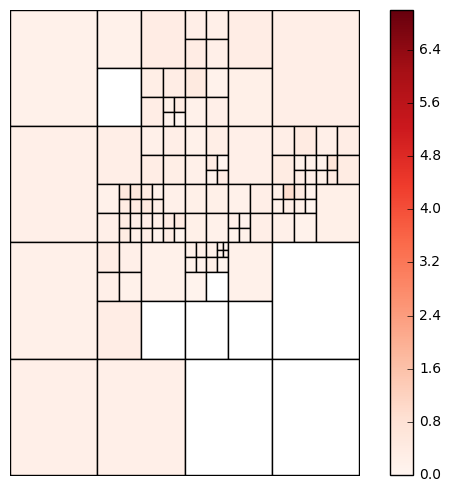

In [14]:
gplt.aggplot(collisions, nmin=20, nmax=500, nsig=5, projection=ccrs.PlateCarree(), 
             hue='NUMBER OF PERSONS INJURED', cmap='Reds')

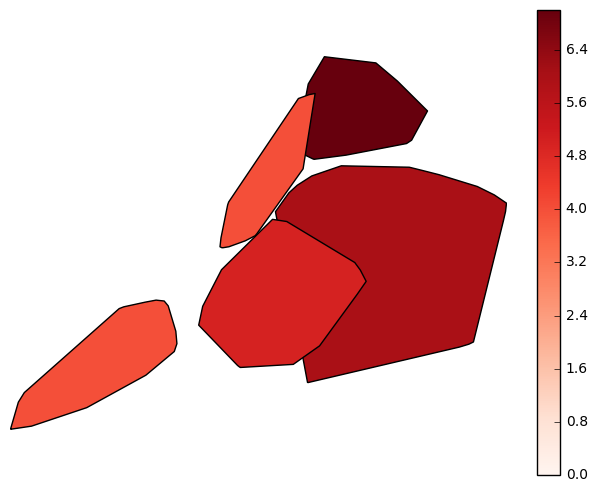

In [44]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             by='BOROUGH', agg=np.max)

In [35]:
gplt.aggplot(collisions, hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             by='BOROUGH', agg=np.max, legend=False)
mplleaflet.display()

(-74.245621999999997, -73.703589900000026, 40.505369000000002, 40.912468100000012)
> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1036)aggplot()
-> _set_extent(ax, projection, extent, extrema)
(Pdb) c
(-74.245621999999997, -73.703589900000026)
(40.505369000000002, 40.912468100000012)


In [ ]:
boroughs_2 = boroughs.set_index('BoroName')
boroughs_2.index = [b.upper() for b in boroughs_2.index]
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=np.max)

# Scrap for later

In [2]:
manhattan = gpd.read_file("../data/manhattan_mappluto/MNMapPLUTO.shp")

In [13]:
manhattan['YearBuilt'] = manhattan['YearBuilt'].replace(0, np.nan)
manhattan = manhattan[['geometry', 'YearBuilt']].dropna()

In [23]:
manhattan = manhattan.reset_index().rename(columns={'index': 'n'})

In [37]:
manhattan.geometry.head(6)

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
5    (POLYGON ((972058.3400000036 190689.2802000046...
Name: geometry, dtype: object

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
5    (POLYGON ((972058.3400000036 190689.2802000046...
Name: geometry, dtype: object


ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[inf, inf], y_limits=[inf, inf]).

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/mpl/feature_artist.py:133: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


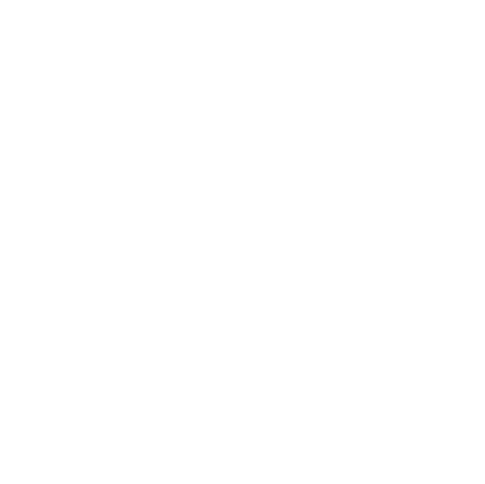

In [44]:
gplt.aggplot(manhattan.head(6), 
             projection=ccrs.AlbersEqualArea(), 
             geometry=manhattan.geometry.head(6), 
             by='n',
             hue='YearBuilt')

In [33]:
manhattan.geometry.head(5)

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
Name: geometry, dtype: object